# Datasets Used:
1. [Finance Sector](https://www.kaggle.com/datasets/camnugent/sandp500)
2. [Energy Sector]()
3. [Enviornmental Sector]()

# Importing Libraries

Importing all the necessary libraries for the implementation of the code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Importing / Pre-Processing Dataset(s)

Importing and Preprocessing the dataset(s) for the implementation of the code.

## Stock Dataset

In [17]:
# Loading The Dataset
stock_data = pd.read_csv('all_stocks_5yr.csv')

# Converting Date Column To Datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

# Printing To Test
print(stock_data.head())

             open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [18]:
# Dropping Missing Values
stock_data.dropna(inplace=True)

# Checking For Missing Values
stock_data.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

## CO2 Dataset

In [19]:
# Loading The Dataset
co2_data=pd.read_csv("co2_daily_mlo.csv")

# Create a new column called 'date'
co2_data['date'] = pd.NaT

# Convert the 'year', 'month', and 'day' columns to strings
co2_data['yr'] = co2_data['yr'].astype(str)
co2_data['mon'] = co2_data['mon'].astype(str)
co2_data['day'] = co2_data['day'].astype(str)

# Concatenate the 'year', 'month', and 'day' columns to form a new column called 'date'
co2_data['date'] = co2_data['yr'] + '-' + co2_data['mon'] + '-' + co2_data['day']

# Converting the 'date' column to datetime format
co2_data['date'] = pd.to_datetime(co2_data['date'])

# Dropping the 'yr', 'mon', and 'day' columns
co2_data.drop(columns=['yr', 'mon', 'day'], inplace=True)

#using date as index and sorting
co2_data.set_index('date',inplace=True)
co2_data.sort_index(inplace=True)

# Printing To Test
print(co2_data.head())

              decimal  CO2 molfrac (ppm)
date                                    
1974-05-19  1974.3781             333.46
1974-05-20  1974.3808             333.64
1974-05-21  1974.3836             333.50
1974-05-22  1974.3863             333.21
1974-05-23  1974.3890             333.05


In [20]:
# Dropping Missing Values
co2_data.dropna(inplace=True)

# Checking For Null Values
co2_data.isnull().sum()

decimal              0
CO2 molfrac (ppm)    0
dtype: int64

## Energy Dataset

In [21]:
# Loading The Dataset
energy_data=pd.read_csv("energy_dataset.csv")

# Printing To Test
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [22]:
# Selecting Useful Columns
energy_data = energy_data[['time','total load actual','price actual']]

# Converting 'time' to datetime
energy_data['time'] = pd.to_datetime(energy_data['time'])

# Setting 'time' as the index
energy_data.set_index('time', inplace=True)

# Printing To Test
print(energy_data.head())

                           total load actual  price actual
time                                                      
2015-01-01 00:00:00+01:00            25385.0         65.41
2015-01-01 01:00:00+01:00            24382.0         64.92
2015-01-01 02:00:00+01:00            22734.0         64.48
2015-01-01 03:00:00+01:00            21286.0         59.32
2015-01-01 04:00:00+01:00            20264.0         56.04


C:\Users\Cosmo\AppData\Local\Temp\ipykernel_34592\2982597893.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy_data['time'] = pd.to_datetime(energy_data['time'])


In [23]:
# Checking For Missing Values
energy_data.isnull().sum()

total load actual    36
price actual          0
dtype: int64

In [24]:
# Filling Missing Values With Forward Fill
energy_data.fillna(method='ffill', inplace=True)

# Checking For Missing Values
energy_data.isnull().sum()

C:\Users\Cosmo\AppData\Local\Temp\ipykernel_34592\1009375034.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  energy_data.fillna(method='ffill', inplace=True)


total load actual    0
price actual         0
dtype: int64

## Checking If Data Is Stationary

Creating a function to check if the data is stationary or not and accordingly making it stationary.

In [33]:
def check_stationarity(data):
    # Plotting The Data
    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title('Time Series Data')
    plt.show()

    # Dropping Missing Or Infinite Values
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Performing The Augmented Dickey-Fuller Test
    adf_test = sm.tsa.adfuller(data)
    print('ADF Statistic:', adf_test[0])
    print('p-value:', adf_test[1])
        
    # Checking The Results
    if adf_test[1] < 0.05:
        print('The Data Is Stationary')
    else:
        print('The Data Is Not Stationary')

Checking if Stock Data is Stationary.

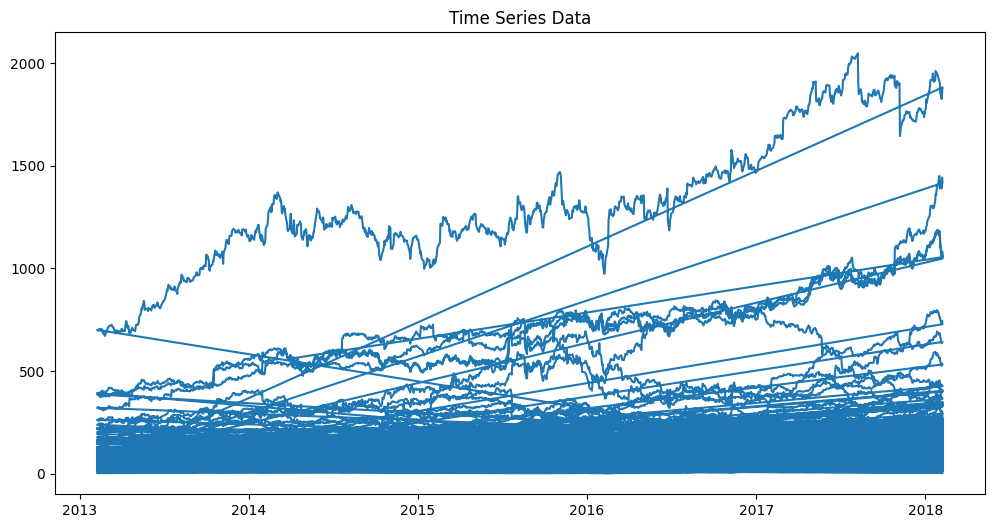

ADF Statistic: -18.098826906751952
p-value: 2.557201165384571e-30
Critical Values: {'1%': -3.430360565689517, '5%': -2.8615446699123814, '10%': -2.5667724856234293}
The Data Is Stationary


In [31]:
check_stationarity(stock_data['close'])

Checking if Environmental Data is Stationary.

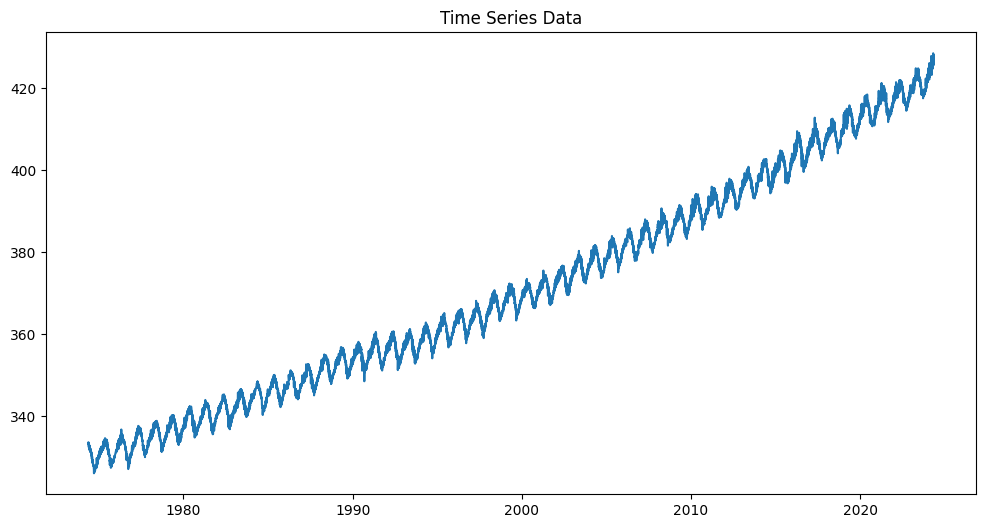

ADF Statistic: -0.8768372753407584
p-value: 0.7955045128099218
The Data Is Not Stationary


In [34]:
check_stationarity(co2_data['CO2 molfrac (ppm)'])

Making Environmental Data Stationary and Running 2nd Iteration.

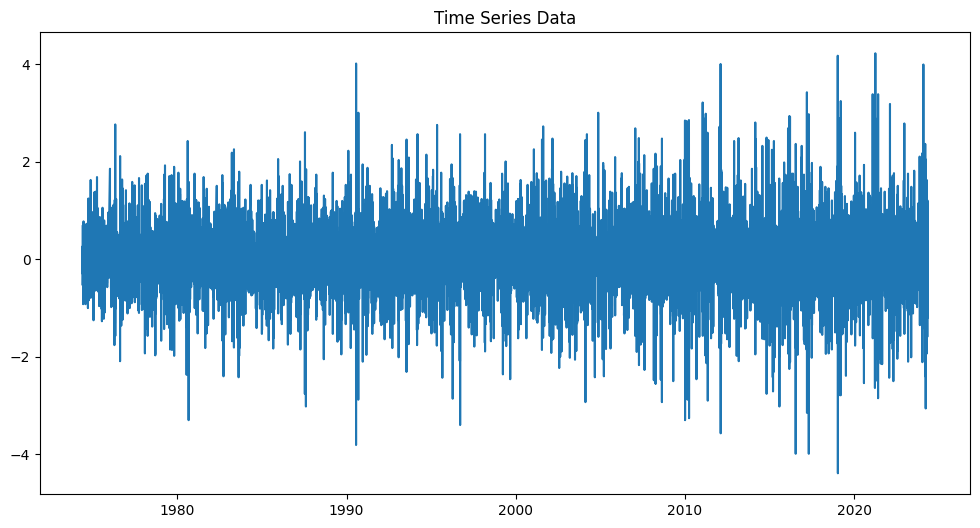

ADF Statistic: -12.188875375575602
p-value: 1.2995568222941374e-22
The Data Is Stationary


In [35]:
# Differencing The Data
co2_data['CO2_diff'] = co2_data['CO2 molfrac (ppm)'].diff()

# Re-Checking For Stationarity
check_stationarity(co2_data['CO2_diff'])

Checking if Energy Data is Stationary.

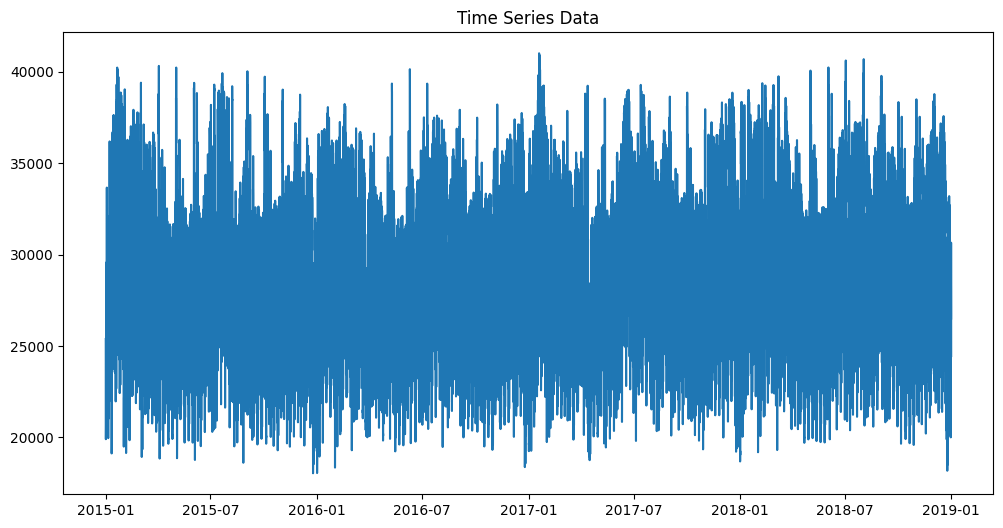

ADF Statistic: -21.44158073935129
p-value: 0.0
Critical Values: {'1%': -3.43053679213716, '5%': -2.8616225575095284, '10%': -2.566813942767471}
The Data Is Stationary


In [28]:
check_stationarity(energy_data['total load actual'])

As of right now all data is stationary and ready to be used for models (with changes being made according to the model requirements).

# Model Implementation

This is the section where we will begin the implementation of all the models while also finding all the results of the models.

## ARIMA Model

### Stock Data

### CO2 Data

### Energy Data

## ANN (Artifical Neural Networks) Model

### Stock Data

### CO2 Data

### Energy Data

## SARIMA (Seasonal ARIMA) Model

### Stock Data

### CO2 Data

### Energy Data

## ETS (Exponential Smoothing) Model

### Stock Data

### CO2 Data

### Energy Data

## Prophet Model

### Stock Data

### CO2 Data

### Energy Data

## SVR (Support Vector Regression) Model

### Stock Data

### CO2 Data

### Energy Data

## LSTM (Long Short-Term Memory) Model

### Stock Data

### CO2 Data

### Energy Data

## Hybrid Model

### Stock Data

### CO2 Data

### Energy Data

# Model Evaluations

In this section we will evaluate all the models and compare them to see which one is more reliable and accurate.

# Frontend Implementation

In this section we will implement the frontend of the project using Streamlit since it is quite easy to use and implement.